# NBA Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NBA_df = pd.read_csv('Preprocessed_NBA.csv')
NBA_df

,Playoff.Wins,FGA,FG_perc,X3PA,X3P_perc,FTA,FT_perc,ORB,DRB,TRB,...,X3PAr,eFG_perc,TOV_perc,ORB_perc,FT.FGA,eFG_perc_1,TOV_perc_2,DRB_perc,FT.FGA_3,Attendance
0,16,27,4,11,11,6,26,21,6,11,...,7,4,24,13,6,2,12,17,3,11
1,14,18,14,22,22,5,15,14,12,10,...,22,21,16,14,7,4,3,6,14,23
2,10,2,7,2,3,26,1,24,9,17,...,2,3,1,27,20,15,9,19,10,3
3,8,28,24,6,8,12,9,26,18,25,...,3,14,9,24,9,5,15,1,15,1
4,7,1,3,9,4,24,18,25,1,3,...,12,2,6,26,29,1,18,21,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,26,21,27,3,23,14,16,7,9,...,24,23,10,16,15,2,21,8,16,15
300,1,2,18,23,20,17,18,2,9,4,...,27,22,6,6,25,12,7,10,17,11
301,1,11,19,10,10,25,16,4,22,15,...,11,12,18,5,22,16,12,13,27,18
302,1,5,10,29,23,1,19,15,6,8,...,29,20,16,21,3,15,15,18,28,21


In [17]:
test_df = pd.read_csv('test.csv')
test_df

,Team,Playoff.Wins,FGA,FG_perc,X3PA,X3P_perc,FTA,FT_perc,ORB,DRB,...,X3PAr,eFG_perc,TOV_perc,ORB_perc,FT.FGA,eFG_perc_1,TOV_perc_2,DRB_perc,FT.FGA_3,Attendance
0,Golden State Warriors,16,21,10,3,8,26,17,20,2,...,2,3,29,18,22,2,7,2,22,9
1,Boston Celtics,14,18,15,9,14,24,2,11,4,...,8,9,13,8,15,1,11,11,9,10
2,Miami Heat,11,28,13,14,1,19,5,18,18,...,10,5,28,12,6,12,3,9,27,4
3,Dallas Mavericks,9,27,18,8,19,22,16,24,20,...,5,13,8,24,18,6,15,8,10,3
4,Milwaukee Bucks,7,8,12,5,5,10,15,15,1,...,6,6,10,15,10,19,27,3,2,11
5,Phoenix Suns,7,6,1,26,9,27,7,19,5,...,27,4,5,19,26,3,9,13,16,19
6,Memphis Grizzlies,6,1,19,23,17,7,28,1,8,...,28,23,4,1,23,10,4,10,15,21
7,Philadelphia 76ers,6,30,16,27,7,3,1,30,19,...,22,16,7,29,1,11,16,17,13,2
8,New Orleans Pelicans,2,16,23,24,27,6,10,3,24,...,24,24,17,3,3,26,8,7,18,24
9,Minnesota Timberwolves,2,5,22,1,12,8,14,6,25,...,3,12,14,7,13,17,2,27,30,20


### Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [5]:
X = NBA_df.loc[:,~NBA_df.columns.isin(['Playoff.Wins'])]
y = NBA_df.loc[:,['Playoff.Wins']]

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [7]:
test_features = test_df.loc[:,~NBA_df.columns.isin(['Playoff.Wins'])]
actual_wins = test_df.loc[:,['Playoff.Wins']]

In [8]:
#using cross validation score to build first model
from sklearn.model_selection import cross_val_score

def rfr_cvs(n_estimators,cv):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    scores = -1*cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error')
    return "score = "+str(scores.mean())+" with n_estimators: "+str(n_estimators)+" and cv: "+str(cv)

In [9]:
rfr_model = RandomForestRegressor(n_estimators=350, random_state=0)
rfr_model.fit(X_train, y_train)
rfr_predicted_wins = rfr_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(rfr_predicted_wins, y_valid)))

<ipython-input-9-c73ca81e8c4d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train, y_train)


Mean Absolute Error: 2.6890225563909773


In [10]:
rfr_predicted_wins = rfr_model.predict(test_features)
rfr_predicted_wins

array([10.84      ,  9.63428571, 10.82      ,  6.58285714,  7.06285714,
       10.42285714,  7.79714286,  7.44571429,  1.47428571,  2.4       ,
        9.86      ,  2.90857143,  3.36571429,  2.44571429,  2.7       ,
        1.61428571])

In [11]:
df = pd.DataFrame({'Team':test_df.index, 'Wins':rfr_predicted_wins})
df.sort_values(by='Wins',ascending=False)

,Team,Wins
0,Golden State Warriors,10.840000
2,Miami Heat,10.820000
5,Phoenix Suns,10.422857
10,Utah Jazz,9.860000
1,Boston Celtics,9.634286
6,Memphis Grizzlies,7.797143
7,Philadelphia 76ers,7.445714
4,Milwaukee Bucks,7.062857
3,Dallas Mavericks,6.582857
12,Denver Nuggets,3.365714


     Feature                     Importance
1) W                              0.410144
2) MOV                            0.063687
3) SOS                            0.045676
4) Attendance                     0.025129
5) SRS                            0.020141
6) O_STL                          0.018798
7) BLK                            0.018636
8) FT.FGA                         0.017420
9) TOV_perc                       0.017397
10) O_3P_perc                      0.016811
11) TOV_perc_2                     0.015403
12) ORB                            0.015007
13) TRB                            0.014918
14) AST                            0.013890
15) eFG_perc                       0.013125


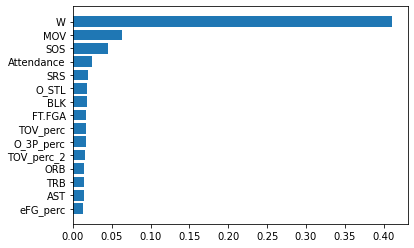

In [13]:
importance = rfr_model.feature_importances_
indices = np.argsort(importance)[::-1]
plot_axis = indices[:15][::-1]
plt.barh(X.columns[plot_axis], importance[plot_axis])

print('     Feature        ', '            Importance')

for f in range(15):
    print("%d) %-*s %f" % (f+1, 30, X.columns[indices[f]], importance[indices[f]]))